# ※ Hand Traking Module.py가 필요 ※

In [1]:
from PIL import Image

# 손의 21개 특징점 위치

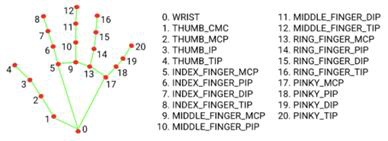

In [2]:
img1 = Image.open("images\image7.jpg")
img1

# 손의 21개 특징점 ID와 x, y 좌표를 활용 

In [ ]:
import cv2
import os
import HandTrackingModule as htm
 
cap = cv2.VideoCapture(0)

detector = htm.handDetector(detectionCon=0.75)

while True:
    success, img = cap.read()
    img = detector.findHands(img) # 손 추적
    lmList = detector.findPosition(img, draw = False) # 21개 특징점 위치

    if len(lmList) != 0:
        if lmList[8][2] > lmList[6][2]: # y축 기준
            print("Close")

    cv2.imshow("Image", img)
    cv2.waitKey(1)

- y축 기준 점 8이 6보다 커지게 되면 Close가 출력된다.

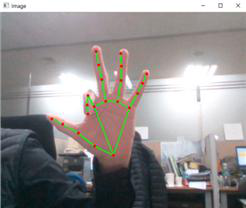

In [3]:
img2 = Image.open("images\image8.jpg")
img2

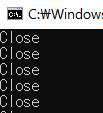

In [4]:
img3 = Image.open("images\image9.jpg")
img3

# 손가락 카운트

In [ ]:
import cv2
import os
import HandTrackingModule as htm
 
cap = cv2.VideoCapture(0)

detector = htm.handDetector(detectionCon=0.75)

tipIds = [4, 8, 12, 16, 20]

while True:
    success, img = cap.read()
    img = detector.findHands(img) # 손 추적
    lmList = detector.findPosition(img, draw = False) # 21개 특징점 위치

    if len(lmList) != 0:
        fingers = []
        for id in range(0,5):
            if lmList[tipIds[id]][2] < lmList[tipIds[id]-2][2]: # y축 기준
                fingers.append(1)
            else:
                fingers.append(0)
        print(fingers)

    cv2.imshow("Image", img)
    cv2.waitKey(1)

- 손가락이 펴지면 1이 출력, 접히면 0이 출력
- ※하지만 엄지는 구조상 접어도 4가 2보다 커지지 않아 0이 출력되지 않음※

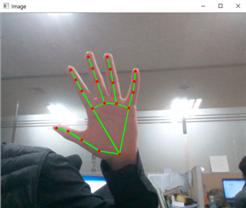

In [5]:
img4 = Image.open("images\image10.jpg")
img4

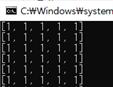

In [7]:
img5 = Image.open("images\image11.jpg")
img5

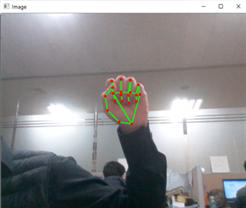

In [8]:
img6 = Image.open("images\image12.jpg")
img6

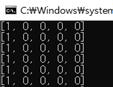

In [9]:
img7 = Image.open("images\image13.jpg")
img7

# 손가락 카운트 (엄지 카운트 해결방법)

In [ ]:
import cv2
import os
import HandTrackingModule as htm
 
cap = cv2.VideoCapture(0)

detector = htm.handDetector(detectionCon=0.75)

tipIds = [4, 8, 12, 16, 20]

while True:
    success, img = cap.read()
    img = detector.findHands(img) # 손 추적
    lmList = detector.findPosition(img, draw = False) # 21개 특징점 위치

    if len(lmList) != 0:
        fingers = []

        # thumb
        if lmList[tipIds[0]][1] > lmList[tipIds[0]-1][1]: # x축 기준
            fingers.append(1)
        else:
            fingers.append(0)

        # 4 Fingers
        for id in range(1,5):
            if lmList[tipIds[id]][2] < lmList[tipIds[id]-2][2]: # y축 기준
                fingers.append(1)
            else:
                fingers.append(0)
        print(fingers)

    cv2.imshow("Image", img)
    cv2.waitKey(1)

- 엄지는 x축 기준으로 수정한다.

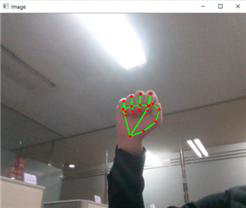

In [11]:
img8 = Image.open("images\image16.jpg")
img8

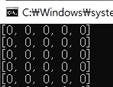

In [12]:
img9 = Image.open("images\image17.jpg")
img9

# 손가락 카운트 + 이미지 출력

In [ ]:
import cv2
import os
import HandTrackingModule as htm
 
cap = cv2.VideoCapture(0)

##### 이미지 파일 읽어오기 ###
folderPath = "FingerImages"
myList = os.listdir(folderPath)
overlayList = []
for imPath in myList:
    image = cv2.imread(f'{folderPath}/{imPath}')
    overlayList.append(image)
##### 이미지 파일 읽어오기 ###

detector = htm.handDetector(detectionCon=0.75)

tipIds = [4, 8, 12, 16, 20]

while True:
    success, img = cap.read()
    img = detector.findHands(img) # 손 추적
    lmList = detector.findPosition(img, draw = False) # 21개 특징점 위치

    if len(lmList) != 0:
        fingers = []

        # thumb
        if lmList[tipIds[0]][1] > lmList[tipIds[0]-1][1]:
            fingers.append(1)
        else:
            fingers.append(0)

        # 4 Fingers
        for id in range(1,5):
            if lmList[tipIds[id]][2] < lmList[tipIds[id]-2][2]:
                fingers.append(1)
            else:
                fingers.append(0)
        
        totalFingers = fingers.count(1)
        print(totalFingers)

        h,w,c = overlayList[totalFingers-1].shape
        img[0:h, 0:w] = overlayList[totalFingers-1]

    cv2.imshow("Image", img)
    cv2.waitKey(1)

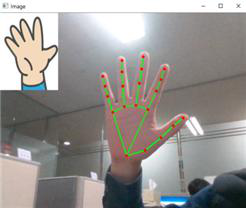

In [13]:
img10 = Image.open("images\image18.jpg")
img10

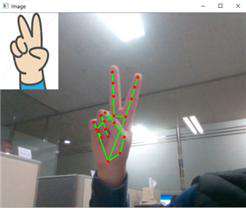

In [14]:
img11 = Image.open("images\image19.jpg")
img11